In [8]:
red_light = "#E7A991"
red_dark = "#E18D6D"

yellow_light = "#F0E6AD"
yellow_dark = "#EBDE93"

blue_light = "#A1BEE2"
blue_dark = "#82A8D9"

green_light = "#CED876"
green_dark = "#BECC51"

cyan_light  = "#88CAB4"
cyan_dark = "#67B99B"

gray_light = "#f1f1f1"
gray_dark = "#a9a9a9"

red_1 = "#7A2B2E"
red_2 = "#E38684"
red_3 = "#F1B3B2"
red_4 =  "#FADFE1"

blue_1 = "#5791C1"
blue_2 = "#7BAFD5"
blue_3 = "#A8C7DF"
blue_4 = "#E2E9F5"

green_1 = "#62A965"
green_2 = "#ACD7A0"
green_3 = "#E9F6E3"

orange_1 = "#BA885E"
orange_2 = "#EDB28D"
orange_3 = "#F6E4DA"


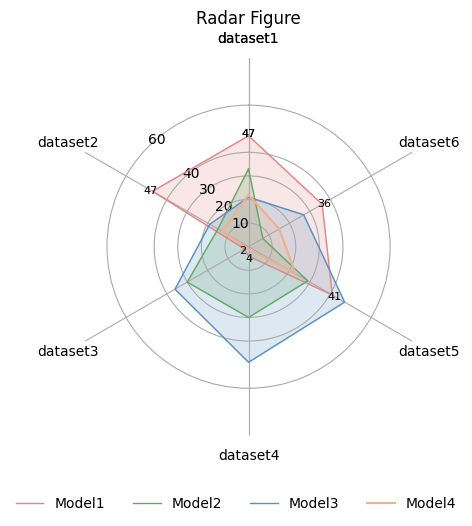

In [45]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False       
import matplotlib.font_manager as font_manager
import matplotlib.patches as mpatches
import random
# Use Roboto font
font_dir = ['../../Roboto']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

results = [
{"dataset1": 5, "dataset2": 5, "dataset3": 5, "dataset4":5, "dataset5":5, "dataset6":5},
{"dataset1": 15, "dataset2": 15, "dataset3": 15, "dataset4":15, "dataset5":15, "dataset6":15},
{"dataset1": 35, "dataset2": 35, "dataset3": 35, "dataset4":35, "dataset5":35, "dataset6":35},
{"dataset1": 55, "dataset2": 55, "dataset3": 55, "dataset4":55, "dataset5":55, "dataset6":55},
]
random.seed(2)
for i in range(len(results)):
    for key in results[i].keys():
        results[i][key] = random.choices(range(0, 50), k=1)[0]
# Data
angles = np.linspace(0, 2*np.pi, num= len(results[0]), endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
# duplicate first value to close the radar
score_a = np.concatenate((score[0], [score[0][0]]))
score_b = np.concatenate((score[1], [score[1][0]]))
score_c = np.concatenate((score[2], [score[2][0]]))
score_d = np.concatenate((score[3], [score[3][0]]))

angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))

# Figure and axes
fig = plt.figure(figsize=(10, 5), dpi=100,facecolor="white")
ax = plt.subplot(polar=True)
# Lines
ax.plot(angles, score_a, color=red_2,linewidth=1)
ax.plot(angles, score_b, color=green_1,linewidth=1,)
ax.plot(angles, score_c, color=blue_1,linewidth=1)
ax.plot(angles, score_d, color=orange_2,linewidth=1.5)
ax.fill(angles,score_a, color = red_2, alpha=0.2) 
ax.fill(angles,score_b, color = green_1,  alpha=0.2) 
ax.fill(angles,score_c, color = blue_1, alpha=0.2)
ax.fill(angles,score_d, color = orange_2, alpha=0.2)

# Text annoations
for ti, di in zip(angles, score_a):
    ax.text(ti, di+1, di, color='black', ha='center', va='center', fontsize=8)
# Spine
ax.spines['polar'].set_visible(False)
# Ticks
ax.set_rlim(0, 80)
ax.set_rticks([10, 20, 30, 40, 60])
# Grid
ax.set_thetagrids(angles*180/np.pi, labels ,weight=400)
ax.grid(color='#AAAAAA')
# Specific for Radar, the begining postion
ax.set_theta_zero_location('N')  # E W S N SW SE NW NE     
# The general label position
ax.set_rlabel_position(45)
# Title
ax.set_title("Radar Figure")
# Legend
fig.legend(["Model1", "Model2", "Model3", "Model4"],loc='outside lower center', frameon= False, fontsize=10,bbox_to_anchor=(0.5, -0.05), ncols=4)
plt.show()